In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
import keras
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import random

from keras import regularizers
import keras_tuner as kt
from keras.layers import BatchNormalization 
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [2]:
# loading csv
df_loader = pd.read_csv('spotify_songs.csv')

In [3]:
# displaying dataframe 
df_loader = shuffle(df_loader)
pd.set_option('display.max_columns', 1000)
df_loader.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16769,3GE52DOmiSQ2R3FHGmYSif,We Got It All (feat. MPH),Sick Individuals,43,49lComPZ8ZTN00M9Bbv3p1,We Got It All (feat. MPH),2019-05-03,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,latin,tropical,0.712,0.744,4,-5.496,1,0.0447,0.017,0.000013,0.532,0.615,107.968,166267
30224,48K6PkRH2xYoQ4UHDf0Tjm,Ocean,SZY,23,1827BzNwLnISYO0kMxmUmV,Ocean,2019-08-02,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,pop edm,0.522,0.670,1,-8.511,1,0.0965,0.507,0.000005,0.179,0.469,160.034,163516
18730,40lcA4lHEMDvwoDMcwd1Xb,MoneyMoney,Tight Rhymes,41,1o9vkmWlF2YUoQuG0OosxB,MoneyMoney,2019-11-22,Great Pops,5SO7xYih5w8X5FEpKvU7Rt,latin,latin pop,0.494,0.799,11,-5.118,1,0.3110,0.191,0.052900,0.110,0.569,86.037,187548
10899,6UU22txTs2o0IaHnDYTk4H,Legaliza,MISAEL,45,0sbpLwI4ifb3IojTzhP0iD,Legaliza,2019-10-11,Dose Trap,37i9dQZF1DWWlW7KLhEhCZ,rap,trap,0.835,0.446,1,-6.562,1,0.0713,0.220,0.000000,0.076,0.261,128.100,274752
5807,5YLb4u68e67Alc1SBC4nGQ,Swag on 100 (feat. Sady Immortal),Sikander Kahlon,30,6jv2F3XZoav9RVUrMLyPY3,Swag on 100 (feat. Sady Immortal),2018-01-25,RAP 91,37i9dQZF1DX1ct2TQrAvRf,rap,hip hop,0.805,0.766,5,-4.549,1,0.1090,0.130,0.000000,0.336,0.562,115.940,185497


In [4]:
# checking for null values
for col in df_loader.columns:
    sum_null = df_loader[col].isna().sum()
    print(col + ": " + str(sum_null))

track_id: 0
track_name: 5
track_artist: 5
track_popularity: 0
track_album_id: 0
track_album_name: 5
track_album_release_date: 0
playlist_name: 0
playlist_id: 0
playlist_genre: 0
playlist_subgenre: 0
danceability: 0
energy: 0
key: 0
loudness: 0
mode: 0
speechiness: 0
acousticness: 0
instrumentalness: 0
liveness: 0
valence: 0
tempo: 0
duration_ms: 0


In [5]:
# removing rows with null values
df_loader = df_loader.dropna()
df_loader.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
# array containing column names for different features relating to a song
characteristics = list(df_loader.select_dtypes(include=['int','float']).columns)
characteristics.remove("track_popularity")
characteristics.remove("mode")
print(characteristics)

['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [7]:
def showViolinPlot(data_frame,x_axis,y_axis):
    '''
        Displaying violin plot using seaborn
        Parameters:
            Dataframe - contains the desired data
            x-axis - Column from said dataframe to be plotted on x-axis
            y-axis - Column from said dataframe to be plotted on y-axis
        Returns:
            Nothing, but shows the plot
    '''
    sns.violinplot(x=data_frame[x_axis], y = data_frame[y_axis])
    plt.show()


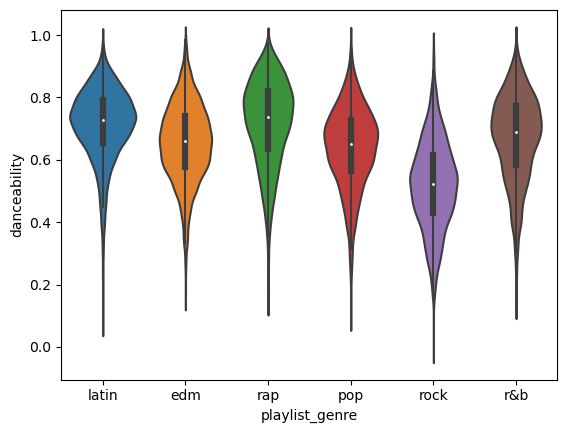

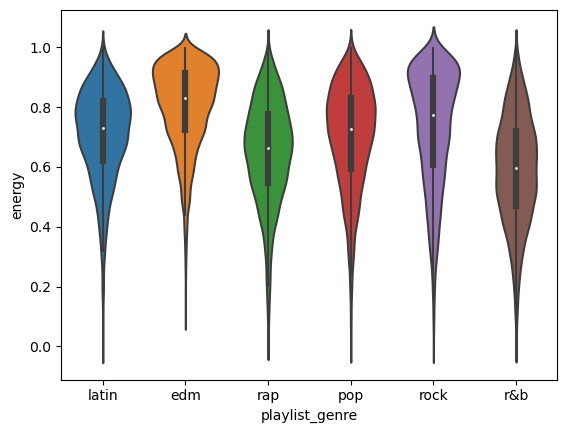

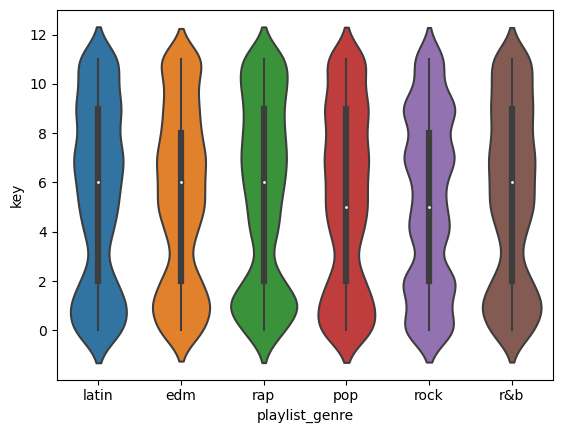

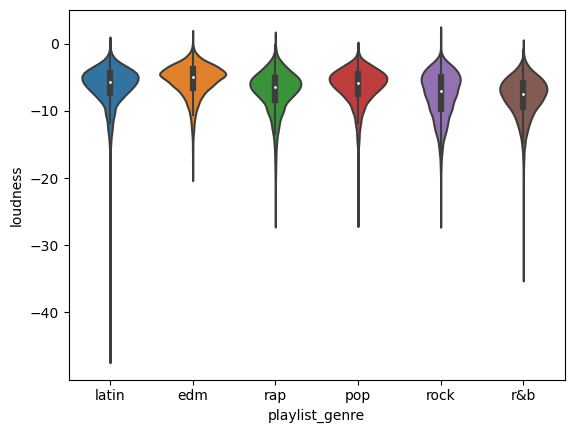

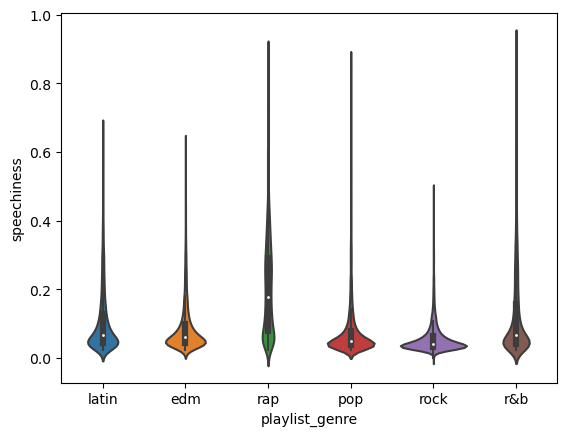

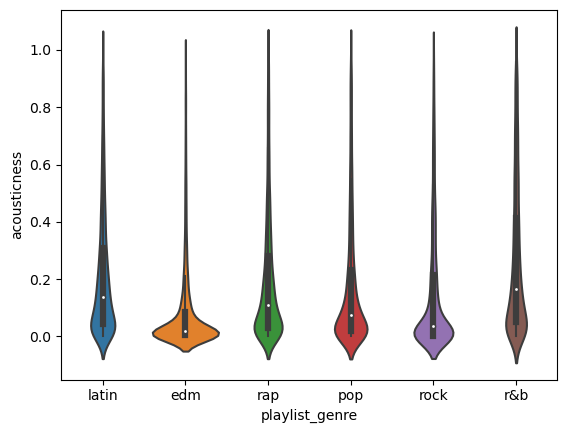

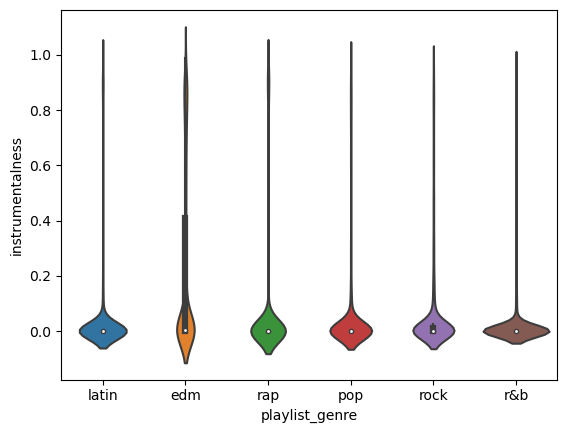

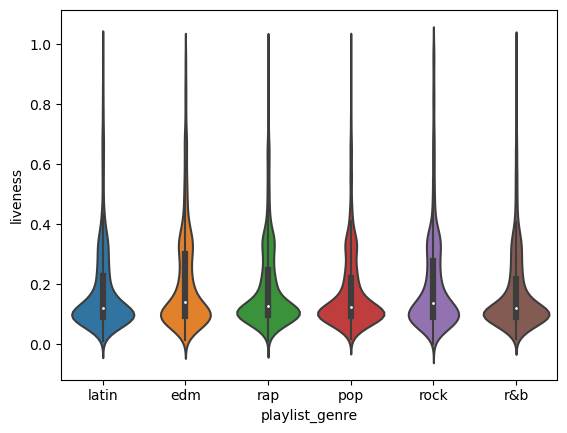

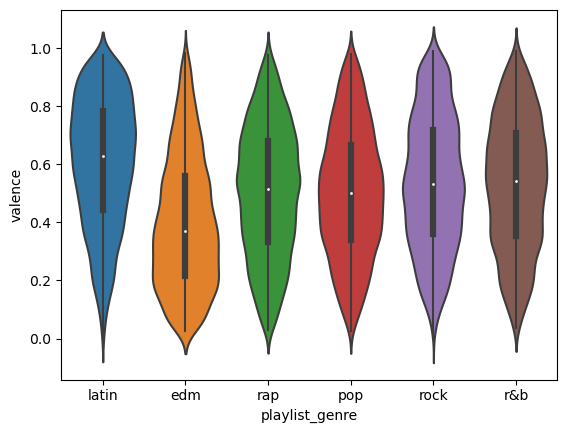

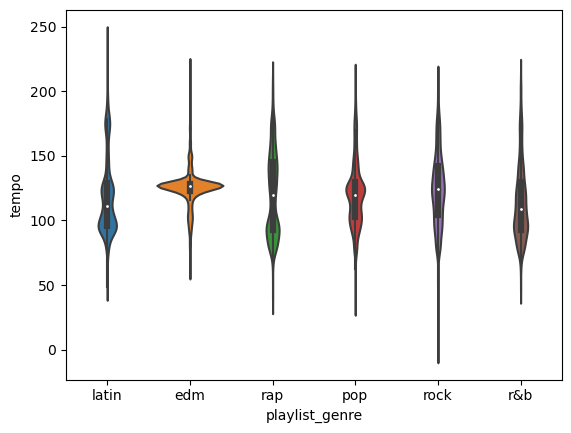

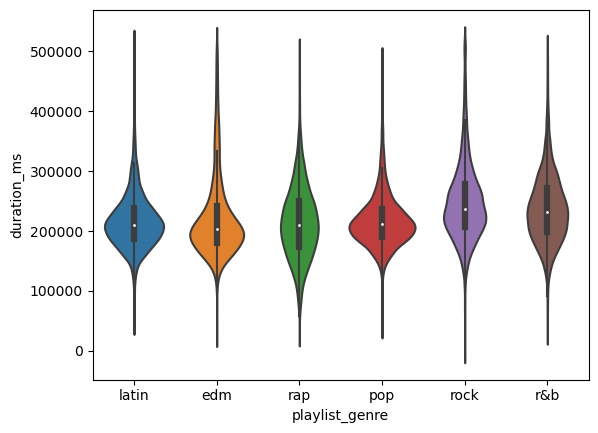

In [8]:
for characteristic in characteristics:
    showViolinPlot(df_loader,'playlist_genre',characteristic)
    

In [9]:
# new df with no outliers
df_clean = df_loader.copy()

In [10]:
def removeOutliers(characteristic):
    medians = df_clean.groupby('playlist_genre')[characteristic].transform('median')
    df_clean[characteristic] = df_clean[characteristic].mask(lambda s: (s - s.mean()).abs() > s.std(), medians)
    #showViolinPlot(df_clean,'playlist_genre',characteristic)

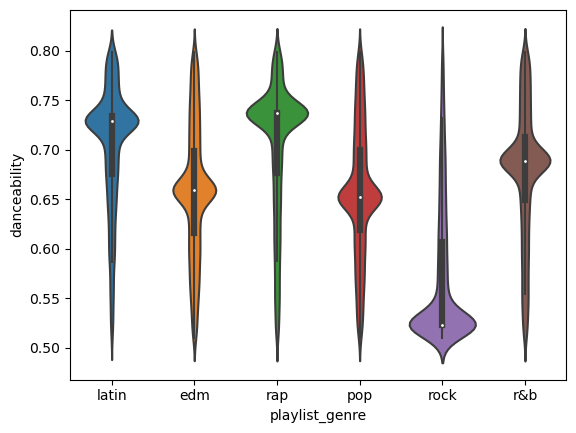

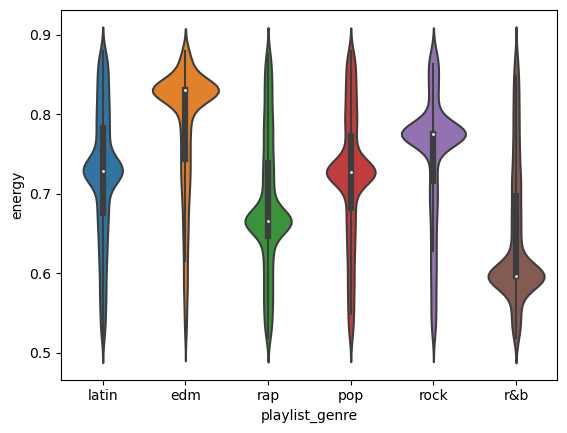

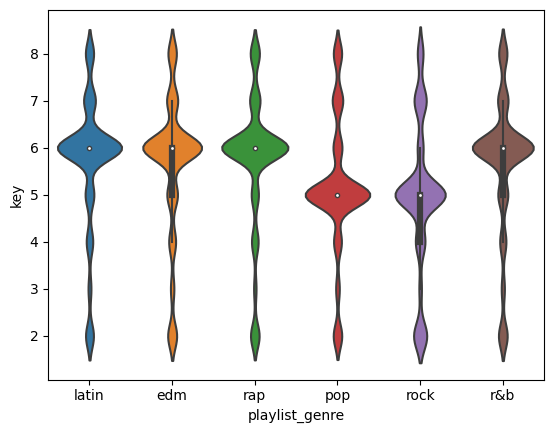

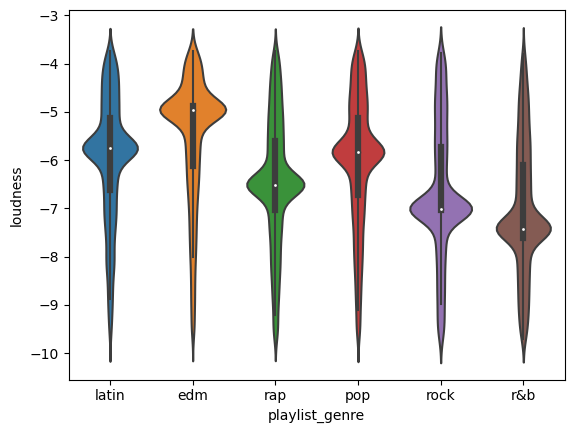

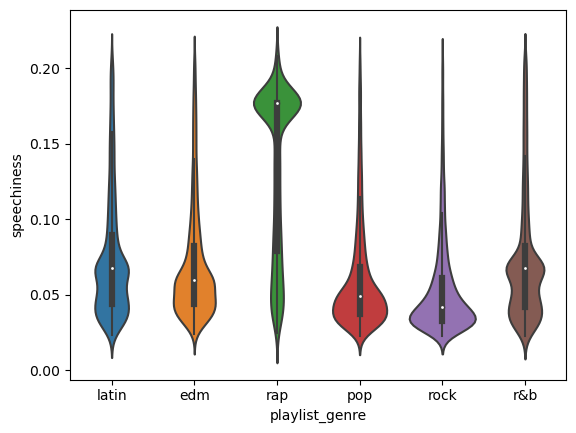

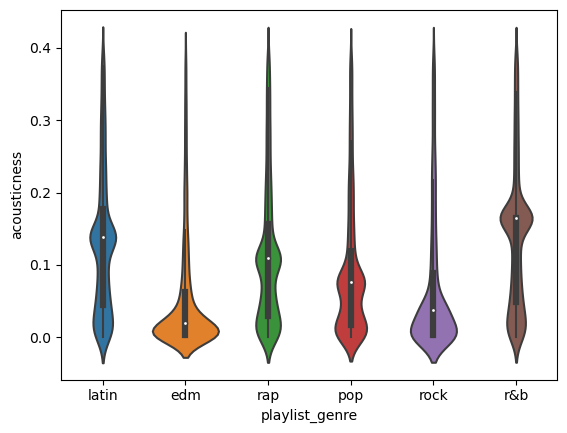

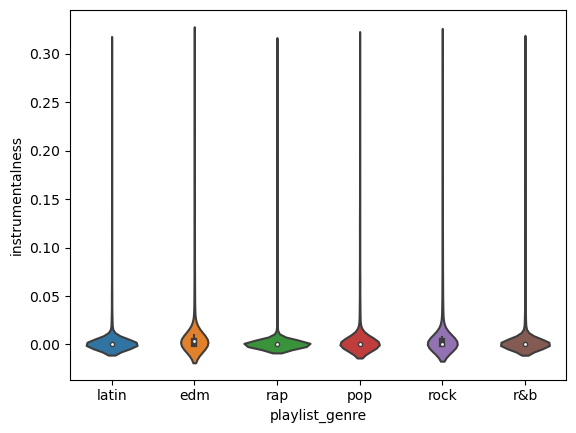

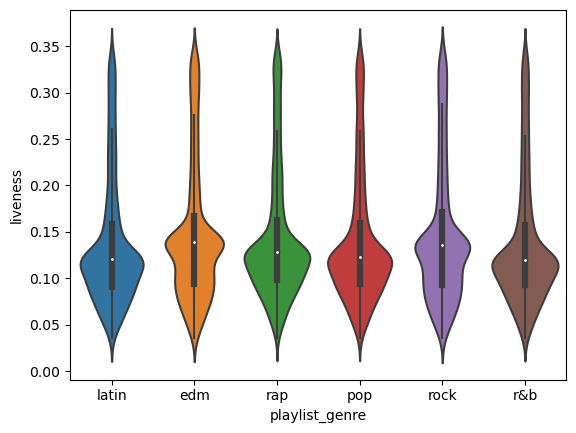

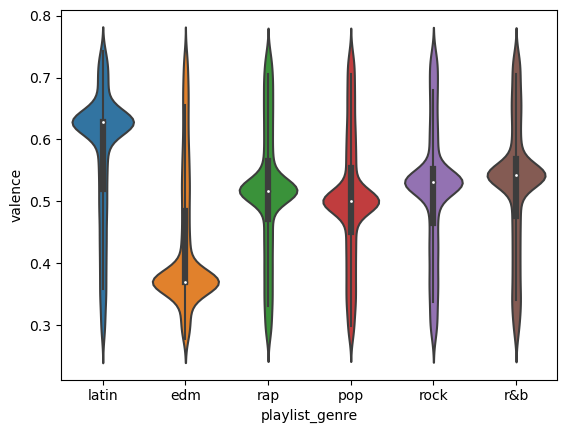

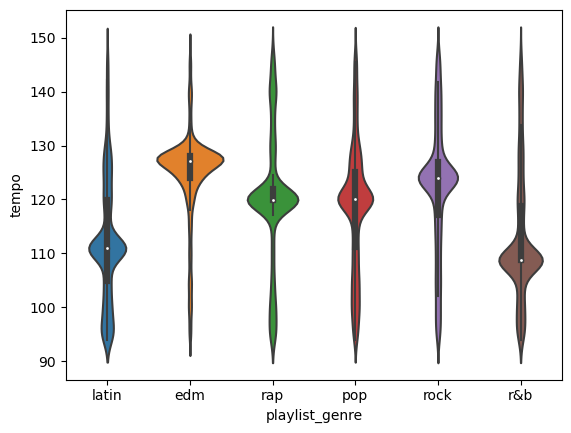

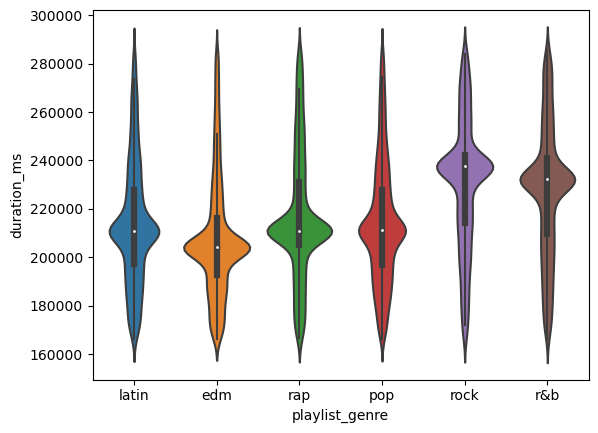

In [11]:
# plotting violin graph for df with no outliers.
# duplicate graphs for some reason
for characteristic in characteristics:
    removeOutliers(characteristic)
    showViolinPlot(df_clean,'playlist_genre',characteristic)

In [12]:
df_clean.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16769,3GE52DOmiSQ2R3FHGmYSif,We Got It All (feat. MPH),Sick Individuals,43,49lComPZ8ZTN00M9Bbv3p1,We Got It All (feat. MPH),2019-05-03,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,latin,tropical,0.712,0.744,4,-5.496,1,0.0447,0.0170,0.000013,0.121,0.615,107.968,166267
30224,48K6PkRH2xYoQ4UHDf0Tjm,Ocean,SZY,23,1827BzNwLnISYO0kMxmUmV,Ocean,2019-08-02,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,pop edm,0.522,0.670,6,-8.511,1,0.0965,0.0193,0.000005,0.179,0.469,127.056,204000
18730,40lcA4lHEMDvwoDMcwd1Xb,MoneyMoney,Tight Rhymes,41,1o9vkmWlF2YUoQuG0OosxB,MoneyMoney,2019-11-22,Great Pops,5SO7xYih5w8X5FEpKvU7Rt,latin,latin pop,0.729,0.799,6,-5.118,1,0.0674,0.1910,0.052900,0.110,0.569,110.962,187548
10899,6UU22txTs2o0IaHnDYTk4H,Legaliza,MISAEL,45,0sbpLwI4ifb3IojTzhP0iD,Legaliza,2019-10-11,Dose Trap,37i9dQZF1DWWlW7KLhEhCZ,rap,trap,0.737,0.665,6,-6.562,1,0.0713,0.2200,0.000000,0.076,0.517,128.100,274752
5807,5YLb4u68e67Alc1SBC4nGQ,Swag on 100 (feat. Sady Immortal),Sikander Kahlon,30,6jv2F3XZoav9RVUrMLyPY3,Swag on 100 (feat. Sady Immortal),2018-01-25,RAP 91,37i9dQZF1DX1ct2TQrAvRf,rap,hip hop,0.737,0.766,5,-4.549,1,0.1090,0.1300,0.000000,0.336,0.562,115.940,185497


In [13]:
encoder_map = {
  "playlist_genre" : {
    "values" : [],
    "uniques" : [],
  },
  "playlist_subgenre" : {
    "values" : [],
    "uniques" : [],
  }}
def encoder(label):
    values, uniques = pd.factorize(df_clean[label]) 
    df_clean[label] = values
    encoder_map[label]["values"], encoder_map[label]["uniques"] = values,uniques

encoder("playlist_genre")
encoder("playlist_subgenre")


In [14]:
print(encoder_map["playlist_genre"]["values"])
print(encoder_map["playlist_genre"]["uniques"])

[0 1 0 ... 3 0 5]
Index(['latin', 'edm', 'rap', 'pop', 'rock', 'r&b'], dtype='object')


In [15]:
df_clean.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16769,3GE52DOmiSQ2R3FHGmYSif,We Got It All (feat. MPH),Sick Individuals,43,49lComPZ8ZTN00M9Bbv3p1,We Got It All (feat. MPH),2019-05-03,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,0,0,0.712,0.744,4,-5.496,1,0.0447,0.0170,0.000013,0.121,0.615,107.968,166267
30224,48K6PkRH2xYoQ4UHDf0Tjm,Ocean,SZY,23,1827BzNwLnISYO0kMxmUmV,Ocean,2019-08-02,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,1,1,0.522,0.670,6,-8.511,1,0.0965,0.0193,0.000005,0.179,0.469,127.056,204000
18730,40lcA4lHEMDvwoDMcwd1Xb,MoneyMoney,Tight Rhymes,41,1o9vkmWlF2YUoQuG0OosxB,MoneyMoney,2019-11-22,Great Pops,5SO7xYih5w8X5FEpKvU7Rt,0,2,0.729,0.799,6,-5.118,1,0.0674,0.1910,0.052900,0.110,0.569,110.962,187548
10899,6UU22txTs2o0IaHnDYTk4H,Legaliza,MISAEL,45,0sbpLwI4ifb3IojTzhP0iD,Legaliza,2019-10-11,Dose Trap,37i9dQZF1DWWlW7KLhEhCZ,2,3,0.737,0.665,6,-6.562,1,0.0713,0.2200,0.000000,0.076,0.517,128.100,274752
5807,5YLb4u68e67Alc1SBC4nGQ,Swag on 100 (feat. Sady Immortal),Sikander Kahlon,30,6jv2F3XZoav9RVUrMLyPY3,Swag on 100 (feat. Sady Immortal),2018-01-25,RAP 91,37i9dQZF1DX1ct2TQrAvRf,2,4,0.737,0.766,5,-4.549,1,0.1090,0.1300,0.000000,0.336,0.562,115.940,185497


In [105]:
df_for_ann = df_clean.iloc[:, 11:-1].copy()
# df_for_ann = df_for_ann.drop(columns = ["liveness","mode"]).copy()
df_for_ann.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
16769,0.712,0.744,4,-5.496,1,0.0447,0.0170,0.000013,0.121,0.615,107.968
30224,0.522,0.670,6,-8.511,1,0.0965,0.0193,0.000005,0.179,0.469,127.056
18730,0.729,0.799,6,-5.118,1,0.0674,0.1910,0.052900,0.110,0.569,110.962
10899,0.737,0.665,6,-6.562,1,0.0713,0.2200,0.000000,0.076,0.517,128.100
5807,0.737,0.766,5,-4.549,1,0.1090,0.1300,0.000000,0.336,0.562,115.940


In [106]:
scaler = preprocessing.MinMaxScaler()
df_for_ann[df_for_ann.columns] = scaler.fit_transform(df_for_ann[df_for_ann.columns])
df_for_ann.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
16769,0.698962,0.626039,0.333333,0.704701,1.0,0.120151,0.043147,0.000040,0.276209,0.724731,0.259972
30224,0.041522,0.421053,0.666667,0.200268,1.0,0.399246,0.048985,0.000017,0.464460,0.410753,0.614754
18730,0.757785,0.778393,0.666667,0.767944,1.0,0.242457,0.484772,0.171197,0.240506,0.625806,0.315620
10899,0.785467,0.407202,0.666667,0.526351,1.0,0.263470,0.558376,0.000000,0.130153,0.513978,0.634159
5807,0.785467,0.686981,0.500000,0.863142,1.0,0.466595,0.329949,0.000000,0.974034,0.610753,0.408145


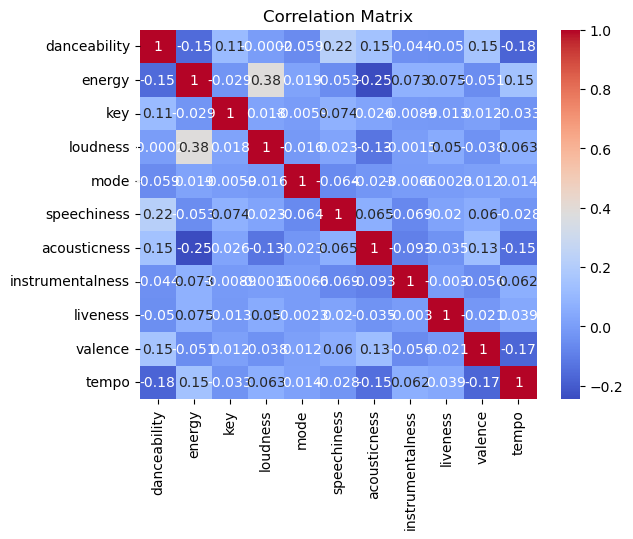

In [107]:
correlation_matrix = df_for_ann.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

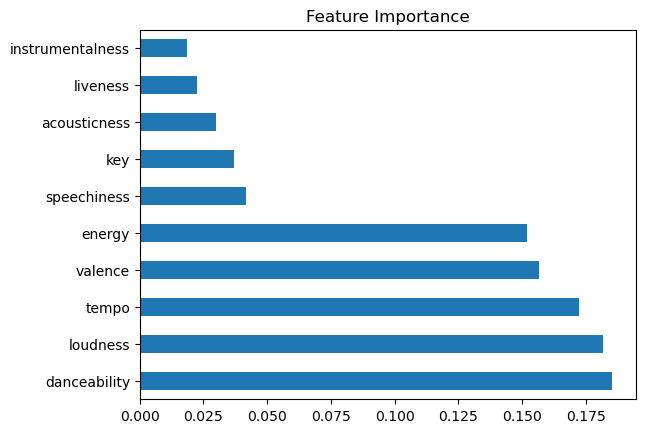

In [54]:
from sklearn.ensemble import RandomForestRegressor

X = df_for_ann
y = df_clean["playlist_genre"]

rf = RandomForestRegressor()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [96]:
#df_for_ann = df_for_ann.drop(columns= ["instrumentalness","liveness","acousticness","key","speechiness"]).copy()

In [108]:
y = df_clean["playlist_genre"]
X = df_for_ann
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [109]:
input_shape_0 = len(list(X.columns))

In [110]:
from keras.layers import Flatten

def model_builder(hp):
    '''
        Outline of the model, defining the options for the keras tuner
        Parameters:
            hp - Internally passed object. instantiates the Hyperparameter
                    object of the keras tuner
        Returns: 
            Building blocks for model
    '''
    model = Sequential()
    model.add(Flatten(input_shape = (input_shape_0,)))
    hp_activation = hp.Choice('activation', values = ['LeakyReLU','gelu']) 
    hp_layer_1 = hp.Int('layer_1', min_value = 0, max_value = 512, step = 16)
    hp_layer_2 = hp.Int('layer_2', min_value = 0, max_value = 512, step = 16)
    hp_layer_3 = hp.Int('layer_3', min_value = 0, max_value = 512, step = 16)
    hp_learning_rate = hp.Choice('learning_rate', values = [0.01, 0.001, 0.0001])
    model.add(BatchNormalization())
    
    model.add(Dense(units = hp_layer_1, activation = hp_activation, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    
    model.add(Dense(units = hp_layer_2, activation = hp_activation, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    
    model.add(Dense(units = hp_layer_3, activation = hp_activation, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    
    model.add(Dense(len(encoder_map["playlist_genre"]["uniques"]), activation = 'softmax'))
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),                  
                      loss='sparse_categorical_crossentropy', 
                      metrics = ['accuracy'] )
    return model

In [111]:
objective_value = 'val_accuracy'
monitor_value = 'val_loss'
trials = 10
restore_flag = True
patience_value = 3
validation_value = 0.21
project = 'playlistGenre_without_duration'
overwrite_bool = True
    
tuner = kt.RandomSearch(
    model_builder,
    objective = objective_value,
    max_trials=trials,
    directory='dir',
    overwrite=True,
    project_name=project
)

In [112]:
es = keras.callbacks.EarlyStopping(
                                   monitor = monitor_value,
                                   mode='auto',
                                   patience=patience_value, 
                                   restore_best_weights = restore_flag)

In [113]:
tuner.search(X_train, y_train, epochs = 75,
            validation_split = validation_value,
            callbacks = [es])

Trial 10 Complete [00h 01m 01s]
val_accuracy: 0.7250048518180847

Best val_accuracy So Far: 0.7397021651268005
Total elapsed time: 00h 16m 46s


In [114]:
hyper_parameters = tuner.get_best_hyperparameters(num_trials = 1)[0]
model = tuner.hypermodel.build(hyper_parameters)
print(model)
history = model.fit(X_train, y_train, epochs = 150, 
                    validation_split = validation_value, 
                    shuffle = True,
                    callbacks = [es])

Epoch 1/150
608/608 [==============================] - 6s 6ms/step - loss: 1.4491 - accuracy: 0.5148 - val_loss: 1.3299 - val_accuracy: 0.5504
Epoch 2/150
608/608 [==============================] - 4s 6ms/step - loss: 1.3402 - accuracy: 0.5416 - val_loss: 1.3092 - val_accuracy: 0.5564
Epoch 3/150
608/608 [==============================] - 4s 6ms/step - loss: 1.3297 - accuracy: 0.5426 - val_loss: 1.2971 - val_accuracy: 0.5637
Epoch 4/150
608/608 [==============================] - 3s 6ms/step - loss: 1.3172 - accuracy: 0.5487 - val_loss: 1.2813 - val_accuracy: 0.5645
Epoch 5/150
608/608 [==============================] - 3s 6ms/step - loss: 1.3023 - accuracy: 0.5556 - val_loss: 1.2685 - val_accuracy: 0.5763
Epoch 6/150
608/608 [==============================] - 3s 6ms/step - loss: 1.2908 - accuracy: 0.5576 - val_loss: 1.2571 - val_accuracy: 0.5775
Epoch 7/150
608/608 [==============================] - 3s 6ms/step - loss: 1.2829 - accuracy: 0.5615 - val_loss: 1.2469 - val_accuracy: 0.5804

608/608 [==============================] - 4s 6ms/step - loss: 0.8980 - accuracy: 0.7005 - val_loss: 0.8318 - val_accuracy: 0.7285
Epoch 58/150
608/608 [==============================] - 4s 6ms/step - loss: 0.8929 - accuracy: 0.7043 - val_loss: 0.8276 - val_accuracy: 0.7310
Epoch 59/150
608/608 [==============================] - 4s 6ms/step - loss: 0.8849 - accuracy: 0.7075 - val_loss: 0.8233 - val_accuracy: 0.7345
Epoch 60/150
608/608 [==============================] - 4s 6ms/step - loss: 0.8860 - accuracy: 0.7079 - val_loss: 0.8215 - val_accuracy: 0.7378
Epoch 61/150
608/608 [==============================] - 4s 6ms/step - loss: 0.8843 - accuracy: 0.7079 - val_loss: 0.8181 - val_accuracy: 0.7378
Epoch 62/150
608/608 [==============================] - 4s 6ms/step - loss: 0.8849 - accuracy: 0.7069 - val_loss: 0.8190 - val_accuracy: 0.7380
Epoch 63/150
608/608 [==============================] - 4s 7ms/step - loss: 0.8856 - accuracy: 0.7058 - val_loss: 0.8167 - val_accuracy: 0.7401
Epoch

In [115]:
for k,v in hyper_parameters.values.items():
    print(f'{k} : {v}')

activation : gelu
layer_1 : 352
layer_2 : 160
layer_3 : 464
learning_rate : 0.0001


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


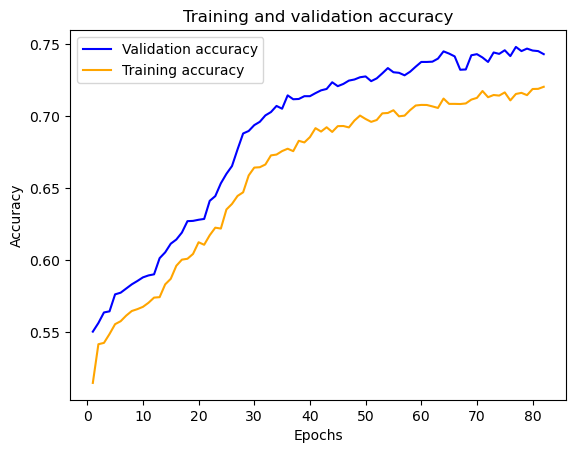

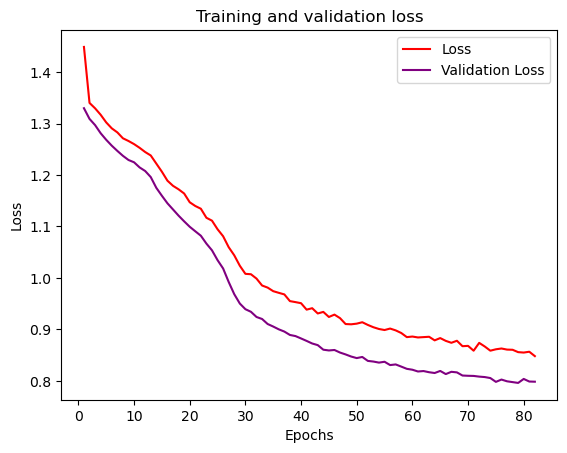

In [116]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc, label='Validation accuracy', color='blue')
plt.plot(epochs, acc, label='Training accuracy',color='orange')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Loss', color = 'red')
plt.plot(epochs, val_loss, label='Validation Loss', color = 'purple')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()